In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATA_DIR = Path("../data/")

In [10]:
df = pd.read_csv(Path(DATA_DIR, "gldv2_micro", "gldv2_micro.csv"))
df

,filename,landmark_id
0,fd1a404e12754adb.jpg,63593
1,f8fc91efb0d408b3.jpg,63593
2,f754a84914ad92f3.jpg,63593
3,f2fa9bde2d444ede.jpg,63593
4,f10af00527cb5f5b.jpg,63593
...,...,...
26392,dff424a36e656ea0.jpg,71234
26393,d7da2684287d4844.jpg,71234
26394,b80854a231f44e8d.jpg,71234
26395,457cb65ba4a1ee3d.jpg,36264


In [11]:
label_counts = df["landmark_id"].value_counts()
label_counts

36264     10
62996      9
51192      9
133122     9
124359     9
          ..
10575      8
20819      8
21327      8
22761      8
71234      8
Name: landmark_id, Length: 3103, dtype: int64

(array([1.531e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.571e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <BarContainer object of 10 artists>)

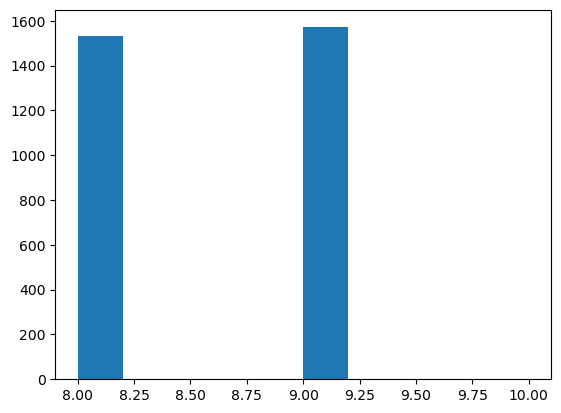

In [12]:
plt.hist(label_counts)

In [13]:
labels, uniques = df["landmark_id"].factorize()

In [14]:
labels

array([   0,    0,    0, ..., 3102, 2029, 2029])

In [15]:
uniques

Int64Index([ 63593,  59833,  25847,  17757,   3662,   3046,    230,  73406,
             32696,  77203,
            ...
            166572, 163537, 163182, 160852, 160163, 158658, 155135, 154160,
            151836,  71234],
           dtype='int64', length=3103)

In [16]:
df["landmark_id"] = labels

In [18]:
df

,filename,landmark_id
0,fd1a404e12754adb.jpg,0
1,f8fc91efb0d408b3.jpg,0
2,f754a84914ad92f3.jpg,0
3,f2fa9bde2d444ede.jpg,0
4,f10af00527cb5f5b.jpg,0
...,...,...
26392,dff424a36e656ea0.jpg,3102
26393,d7da2684287d4844.jpg,3102
26394,b80854a231f44e8d.jpg,3102
26395,457cb65ba4a1ee3d.jpg,2029


In [20]:
df_val = df.groupby("landmark_id").sample(n=1, random_state=1)
df_trn = df[~df["filename"].isin(df_val["filename"])]
df_trn.to_csv(DATA_DIR.joinpath("gldv2_micro", "train.csv"), index=False)
df_val.to_csv(DATA_DIR.joinpath("gldv2_micro", "val.csv"), index=False)